# Clasificación

En este colab se van a encontrar con un problema de clasificación con tres posibles salidas, es decir la variable explicada `y` puede tomar tres valores categoricos (cualitativos) en este caso.

[Iris dataset](https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv)

Este dataset es un recopilación de datos de flores de 3 tipos: setosa, versicolor, and virginica.

La idea es que con las medidas del sepalo (ancho,alto) y del petalo (ancho,alto)
podemos entrenar un modelo de clasificación para que aprenda a distinguir entre estos 3 tipos de flores.

Para investigar acerca del dataset: [link](https://archive.ics.uci.edu/ml/datasets/iris)

## Descargamos el dataset 

In [ ]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2022-09-28 11:41:39--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv’

IRIS.csv            100%[===================>]   4.51K  --.-KB/s    in 0s      

2022-09-28 11:41:40 (44.5 MB/s) - ‘IRIS.csv’ saved [4617/4617]



## Inspeccionamos el dataset

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
iris = pd.read_csv('IRIS.csv')
iris.head(3) #Observamos los 3 primeros registros con la función .head(), también pueden usar .tail() para ver los ultimos

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


>**Nota:** Podemos observar que las variables explicativas son 4: sepal_length, sepal_width, petal_lenght y petal_width, donde sus datos son del tipo flotantes, sin valores nulos. Estos simplifica el proceso de limpieza de datos. La variable explicada en este caso es species que contiene el nombre de cada especie.

In [ ]:
# Vemos la cantidad de registros para cada especie
iris['species'].value_counts() #también pueden usar el argumento True -> .value_counts(True) para ver de forma proporcional los datos

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

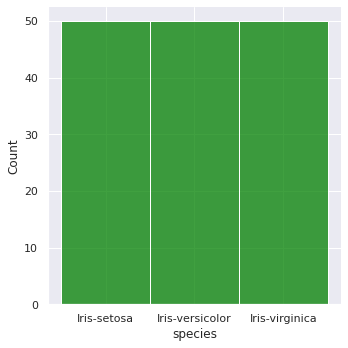

In [ ]:
sns.displot(iris['species'],color='green');

>**Nota:** Observamos que el dataset esta `balanceado`, es decir, tiene la misma cantidad de registros para cada especie lo cual resulta beneficioso para eviatr que el modelo caiga en un mal aprendizaje.

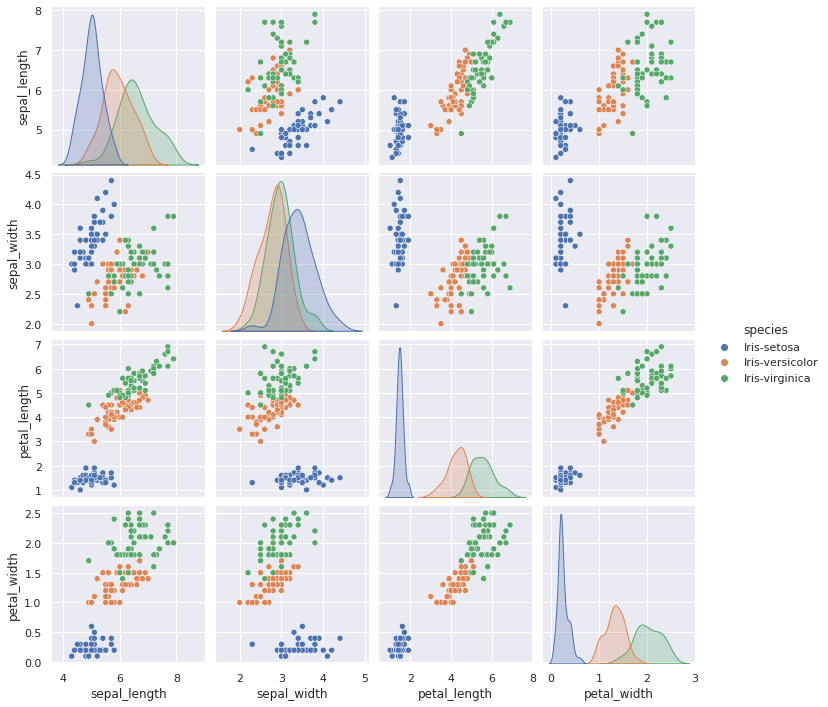

In [ ]:
# Podemos usar un pairplot para correlacionar las variables explicativas
sns.pairplot(data=iris,hue='species')

## Armamos el dataset para entrenar

In [ ]:
X = iris.drop(columns='species').to_numpy()
y = iris['species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

print(f"Set de entenamiento: {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo: {Xtest.shape}, {ytest.shape}")

Set de entenamiento: (112, 4), (112,)
Set de testeo: (38, 4), (38,)


## Entrenamos el modelo Logistic Regression

El modelo logistic regression está construido para optimizar los párametros mediante el error de la función `BinaryCrossEntropy` para lo cual sería ideal dos clases.

Cuando existen más clases lo que hace es hacer en cada iteración una `clase vs todas las otras`de esta manera conserva el mismo principio.

Para setear el algoritmo en sklearn de logistic regression aplicado a multiclase, como en este caso que son 3 clases de flores, usamos el parametro `multi_class: {‘auto’, ‘ovr’, ‘multinomial’}` seteado en 'multinomial'.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(Xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

## Evaluamos el modelo

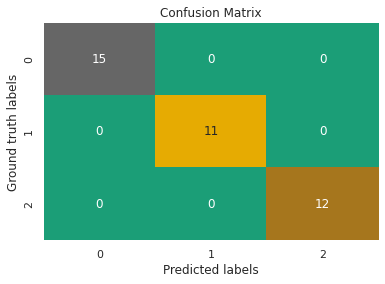

In [ ]:
from sklearn import metrics as ms
y_pred_logreg = log_reg.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_logreg)
sns.heatmap(confusion_matrix,annot=True,cbar=False,cmap='Dark2')
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [ ]:
acc_logreg = ms.accuracy_score(y_true = ytest, y_pred = y_pred_logreg)
precision_logreg = ms.precision_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')
recall_logreg = ms.recall_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')
f1_logreg = ms.f1_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')

logreg_metrics = {"Accuracy":acc_logreg,
                  "Precision":precision_logreg,
                  "Recall":recall_logreg,
                  "F1":f1_logreg}
logreg_metrics

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

## Predicción

Tomamos un conjunto de datos que represente las variables de entradas para ver que nos devuelve el modelo.

La idea es simular al modelo tomando datos nuevos, ya sea através de algun sensor de los datos:

* sepal_length
* sepal_width
* petal_length
* petal_width	

In [ ]:
#Creamos datos nuevos
X_prueba = np.array([[3.4, 1.9, 1.2, 0.3]]) # en el array tenemos: sepal_length,	sepal_width,	petal_length,	petal_width	

#Luego predecimos
y_pred = log_reg.predict(X_prueba)

#Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-setosa']




---



# Naive Bayes

Ahora el ejercicio es que repitan la experiencia que se realizó con Logistic Regression.

Para eso deben:
1. Explorar el dataset por su cuenta.
2. Anotar observaciones que ustedes concluyan.
3. Armar el dataset para entrenar y testear.
4. Implementar el algoritmo de Naive Bayes -> [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
5. Evaluarlo con las metricas que hemos visto (ROC-AUC es solo para clasificación binaria).
6. Hacer un predicción.

## 1) Exploración del dataset

In [ ]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2022-09-28 11:42:00--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv.1’

IRIS.csv.1          100%[===================>]   4.51K  --.-KB/s    in 0s      

2022-09-28 11:42:00 (27.3 MB/s) - ‘IRIS.csv.1’ saved [4617/4617]



In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
from scipy.stats import shapiro
sns.set()



In [ ]:
data = pd.read_csv('IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

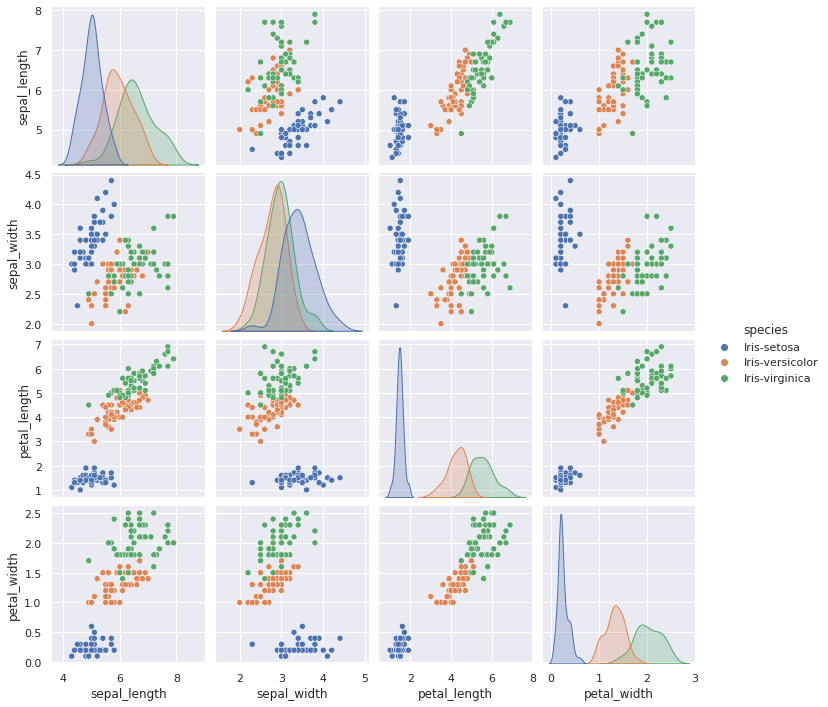

In [ ]:
sns.pairplot(data=data,hue='species')

In [ ]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
y = data['species'].to_numpy()

In [ ]:
normalidad_X_sepal_length = shapiro(X[:,0])
normalidad_X_sepal_width = shapiro(X[:,1])
normalidad_X_petal_length = shapiro(X[:,2])
normalidad_X_petal_width = shapiro(X[:,3])
print(f'normalidad_X_sepal_length {normalidad_X_sepal_length}')
print(f'normalidad_X_sepal_width {normalidad_X_sepal_width}')
print(f'normalidad_X_petal_length {normalidad_X_petal_length}')
print(f'normalidad_X_petal_width {normalidad_X_petal_width}')


normalidad_X_sepal_length ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)
normalidad_X_sepal_width ShapiroResult(statistic=0.9837918877601624, pvalue=0.0751834362745285)
normalidad_X_petal_length ShapiroResult(statistic=0.8764241933822632, pvalue=7.544982416618495e-10)
normalidad_X_petal_width ShapiroResult(statistic=0.902624249458313, pvalue=1.864667886763982e-08)


Solamente la variable independiente 'sepal_width' es normal, porque su p_value es mayor a 0.05. AL ser una sola variable normal, se analizará la correlación entre todas utilizando el método de Kendall.

Text(0.5, 1.0, 'Distribución de X["petal_width"]')

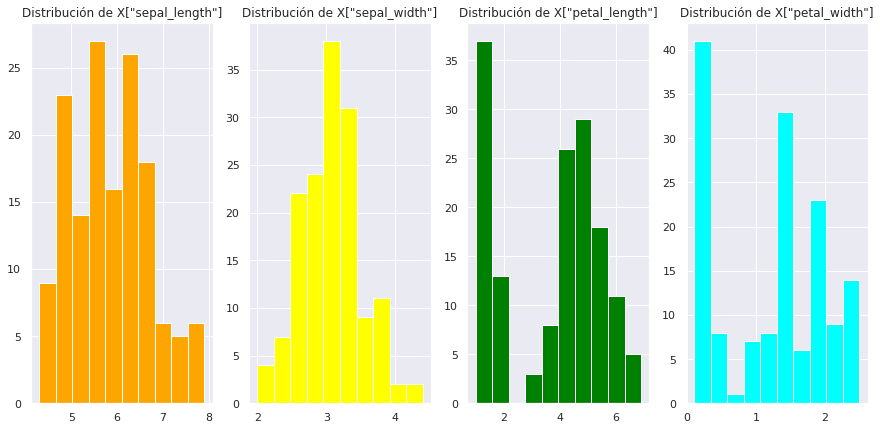

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.hist(X[:,0], color='orange', density=False)
plt.title('Distribución de X["sepal_length"]')
plt.subplot(1,4,2)
plt.hist(X[:,1], color='yellow', density=False)
plt.title('Distribución de X["sepal_width"]')
plt.subplot(1,4,3)
plt.hist(X[:,2],color='green', density=False)
plt.title('Distribución de X["petal_length"]')
plt.subplot(1,4,4)
plt.hist(X[:,3], color='cyan', density=False)
plt.title('Distribución de X["petal_width"]')

Text(0.5, 1.0, 'Mapa de correlación ente las variables con método Kendall')

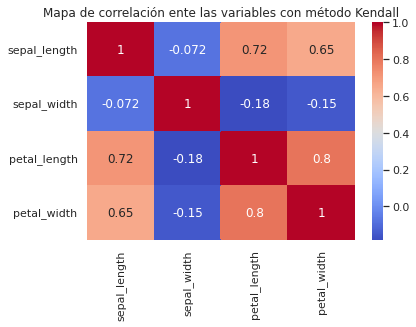

In [ ]:
sns.heatmap(data.corr(method = 'kendall'), cmap='coolwarm', annot=True)
plt.title('Mapa de correlación ente las variables con método Kendall')

Text(0.5, 1.0, "Gráfica de correlación entre X['sepal_length'] e X['petal_width']")

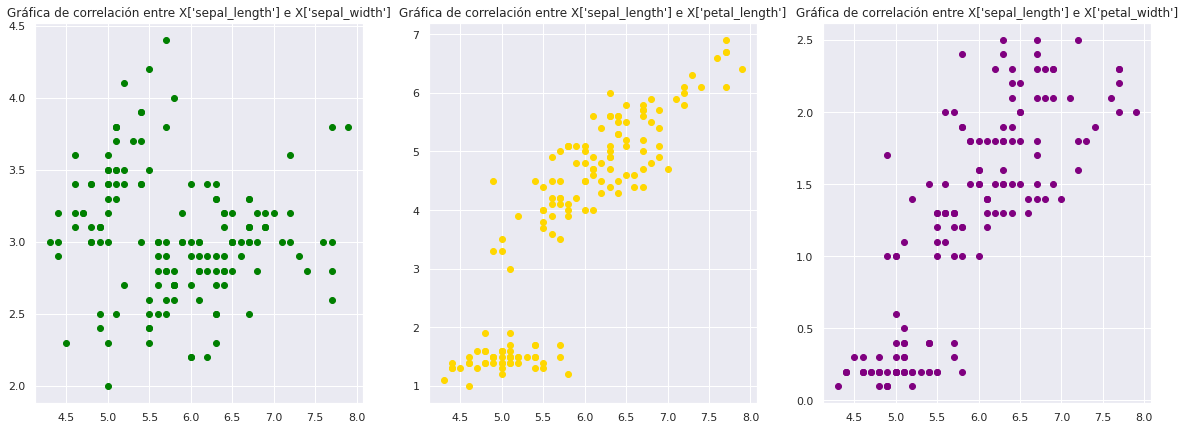

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['sepal_length'] e X['sepal_width']")
plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,2],color='gold')
plt.title("Gráfica de correlación entre X['sepal_length'] e X['petal_length']")
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,3],color='purple')
plt.title("Gráfica de correlación entre X['sepal_length'] e X['petal_width']")


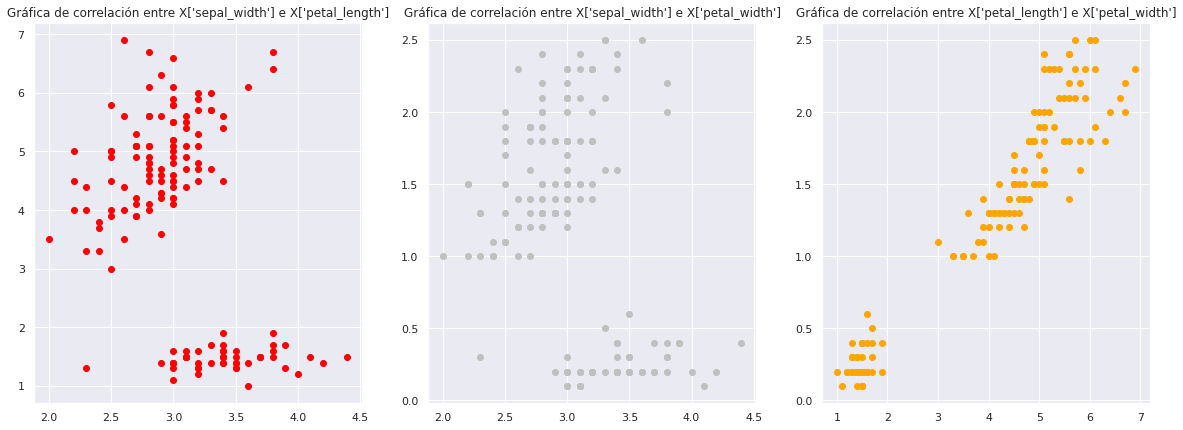

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,1],X[:,2],color='red')
plt.title("Gráfica de correlación entre X['sepal_width'] e X['petal_length']")
plt.subplot(1,3,2)
plt.scatter(X[:,1],X[:,3],color='silver')
plt.title("Gráfica de correlación entre X['sepal_width'] e X['petal_width']")
plt.subplot(1,3,3)
plt.scatter(X[:,2],X[:,3],color='orange')
plt.title("Gráfica de correlación entre X['petal_length'] e X['petal_width']");

In [ ]:
#Otra forma de analizar el dataset con mayor profundidad sería separándolo en especies
#iris_setosa = data['species'] == 'Iris-setosa' 
#data[iris_setosa]

## 2) Conclusiones sobre el dataset

A) El dataset contiene 5 columnas: largo del sépalo, ancho del sépalo, largo del pétalo, ancho del pétalo y especies. Por lo que deducimos que se intenta clasificar según la especie a través de las medidas del sépalo y pétalo.

B) Solamente la variable a ancho del sépalo es normal, mientas que las otras 3 variables númericas no son normales. Cabe aclarar que se analizó cada variable conteniendo todas las especies, por lo que si se analizara cada variables separada por especie, probablemente cada nueva variable sería normal.

C) Existe correlación moderada entre largo del sépalo y ancho del pétalo, largo del sépalo y largo del pétalo, largo del pétalo y largo del sépalo, y ancho del pétalo y largo del sépalo.
Existe correlación fuerte entre: lardo del pétalo y ancho del sépalo, y entre ancho del pétalo y largo del pétalo.
La correlacion entre cada variable también se analizó mezclando las especies, por lo que si se hiciese separando cada una se encontrarían más y mejores correlaciones.


## 3) Armado del dataset para entrenamiento y testeo

  A continuación, se va a separar el dataset en tres, uno por cada especie, para eliminar luego el primer registro de cada uno y almacenarlo en una variable aparrte. Finalmente, se va a crear un nuevo dataset concatenando los tres anteriores. 
  
  Todo este proceso se realiza para guardar un registro de cada especie en una variable aparte, de modo que el modelo no se entrene con los registros extraídos, y puedan luego usarse para hacer predicciones con el modelo ya entrenado.

In [105]:
iris_setosa_filter = data['species'] == 'Iris-setosa'
data_iris_setosa = data[iris_setosa_filter]
iris_setosa_row = pd.DataFrame(data_iris_setosa.loc[0]).T
data_iris_setosa = data_iris_setosa.drop(0)
data_iris_setosa =  data_iris_setosa.reset_index(drop=True)
data_iris_setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [106]:
iris_versicolor_filter = data['species'] == 'Iris-versicolor'
data_iris_versicolor = data[iris_versicolor_filter]
data_iris_versicolor =  data_iris_versicolor.reset_index(drop=True)
iris_versicolor_row = pd.DataFrame(data_iris_versicolor.loc[0]).T
data_iris_versicolor = data_iris_versicolor.drop(0)
data_iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor
5,5.7,2.8,4.5,1.3,Iris-versicolor
6,6.3,3.3,4.7,1.6,Iris-versicolor
7,4.9,2.4,3.3,1.0,Iris-versicolor
8,6.6,2.9,4.6,1.3,Iris-versicolor
9,5.2,2.7,3.9,1.4,Iris-versicolor
10,5.0,2.0,3.5,1.0,Iris-versicolor


In [107]:
iris_virginica_filter = data['species'] == 'Iris-virginica'
data_iris_virginica = data[iris_virginica_filter]
data_iris_virginica =  data_iris_virginica.reset_index(drop=True)
iris_virginica_row = pd.DataFrame(data_iris_virginica.loc[0]).T
data_iris_virginica = data_iris_virginica.drop(0)
data_iris_virginica

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica
5,7.6,3.0,6.6,2.1,Iris-virginica
6,4.9,2.5,4.5,1.7,Iris-virginica
7,7.3,2.9,6.3,1.8,Iris-virginica
8,6.7,2.5,5.8,1.8,Iris-virginica
9,7.2,3.6,6.1,2.5,Iris-virginica
10,6.5,3.2,5.1,2.0,Iris-virginica


In [ ]:
data_fixed = pd.concat([data_iris_setosa, data_iris_versicolor, data_iris_virginica])
data_fixed = data_fixed.reset_index(drop=True)
data_fixed

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data_fixed.drop(columns='species').to_numpy()
y = data_fixed['species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

print(f"Set de entenamiento: {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo: {Xtest.shape}, {ytest.shape}")

Set de entenamiento: (110, 4), (110,)
Set de testeo: (37, 4), (37,)


## 4) Implementación del algoritmo  de Naive Bayes

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
model_naive = make_pipeline(MinMaxScaler(),MultinomialNB())
model_naive.fit(Xtrain,ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

## 5) Evaluación del modelo

In [ ]:
print(f"R2 en entrenamiento: {model_naive.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_naive.score(Xtest,ytest)}")

R2 en entrenamiento: 0.6636363636363637
R2 en testeo: 0.6486486486486487


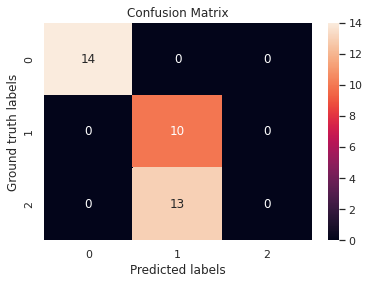

In [ ]:
y_pred_naive = model_naive.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_naive, labels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
sns.heatmap(confusion_matrix, annot=True,cbar=True)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [ ]:
acc_naive = ms.accuracy_score(y_true = ytest, y_pred = y_pred_naive)
precision_naive = ms.precision_score(y_true = ytest, y_pred = y_pred_naive, average = 'macro',zero_division=0)
recall_naive = ms.recall_score(y_true = ytest, y_pred = y_pred_naive, average = 'macro',zero_division=0)
f1_naive = ms.f1_score(y_true = ytest, y_pred = y_pred_naive, average = 'macro',zero_division=0)

naive_metrics = {"Accuracy":acc_naive,
                  "Precision":precision_naive,
                  "Recall":recall_naive,
                  "F1":f1_naive}
naive_metrics

{'Accuracy': 0.6486486486486487,
 'Precision': 0.47826086956521735,
 'Recall': 0.6666666666666666,
 'F1': 0.5353535353535354}

## 6) Precicciones

Iris Setosa

In [113]:
y_pred = model_naive.predict(iris_setosa_row[['sepal_length','sepal_width', 'petal_length', 'petal_width']].to_numpy())

print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-setosa']


Iris Versicolor

In [114]:
y_pred = model_naive.predict(iris_versicolor_row[['sepal_length','sepal_width', 'petal_length', 'petal_width']].to_numpy())

print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-versicolor']


Iris Virginica

In [115]:
y_pred = model_naive.predict(iris_virginica_row[['sepal_length','sepal_width', 'petal_length', 'petal_width']].to_numpy())

print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-versicolor']


Esta última predicción falla, ya que al modelo le cuesta predecir la especie de Iris Versicolor, como se había expresado en la matriz de confusión. 
Este fallo se debe a que el modelo se ajusta más a las relaciones que hay entre los tamaños de las otras dos especies, por lo que cuando analiza datos de Iris Versicolor, no la puede distinguir.